In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/data2pcaBreatcancer data.csv')
print(df)
np.set_printoptions(suppress=True) #so you do not get e or any notations

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [31]:
X = df.iloc[:,2:-1]
X = X.to_numpy()
print(X)

[[ 17.99     10.38    122.8     ...   0.2654    0.4601    0.1189 ]
 [ 20.57     17.77    132.9     ...   0.186     0.275     0.08902]
 [ 19.69     21.25    130.      ...   0.243     0.3613    0.08758]
 ...
 [ 16.6      28.08    108.3     ...   0.1418    0.2218    0.0782 ]
 [ 20.6      29.33    140.1     ...   0.265     0.4087    0.124  ]
 [  7.76     24.54     47.92    ...   0.        0.2871    0.07039]]


In [32]:
X_standardized = StandardScaler().fit_transform(X)
print(X_standardized)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [33]:
pca = PCA()
X_pca = pca.fit_transform(X_standardized)
print(X_pca)

[[ 9.19283683  1.94858307 -1.12316616 ...  0.03391445 -0.04564772
   0.04716921]
 [ 2.3878018  -3.76817174 -0.52929269 ... -0.03262418  0.00568742
   0.00186788]
 [ 5.73389628 -1.0751738  -0.55174759 ... -0.04702582 -0.0031459
  -0.00075053]
 ...
 [ 1.25617928 -1.90229671  0.56273053 ...  0.00257776 -0.00670621
  -0.00377042]
 [10.37479406  1.67201011 -1.87702933 ...  0.06808638  0.08416328
   0.02378282]
 [-5.4752433  -0.67063679  1.49044308 ...  0.00951588  0.06091311
   0.01947559]]


In [34]:
#checking the variance covered by the PCs
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396
 0.00164925 0.00103865 0.0009991  0.00091465 0.00081136 0.00060183
 0.00051604 0.00027259 0.00023002 0.00005298 0.00002496 0.00000443]


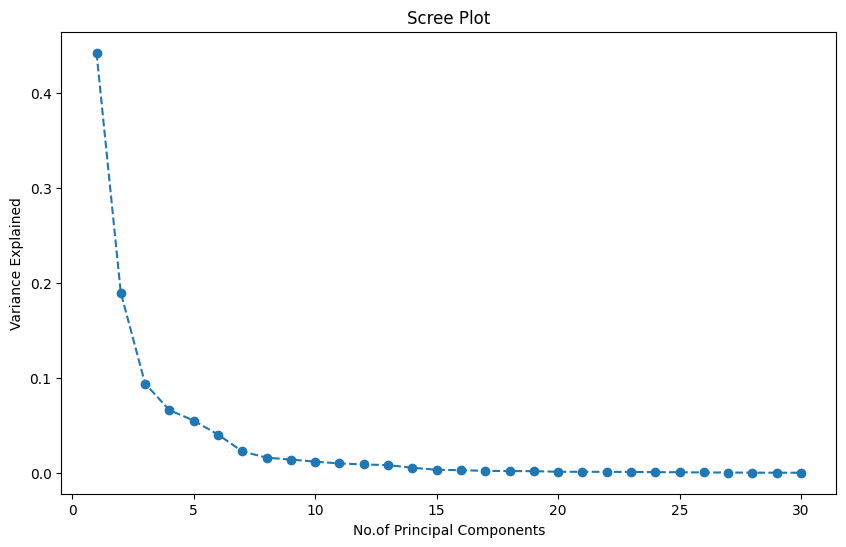

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o',linestyle='--')
plt.xlabel('No.of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

In [37]:
s = np.sum(explained_variance[:7])
print(s)

0.9100953006967311


We take 7 PCs using elbow method as it covers 91% variance of the dataset